<a href="https://colab.research.google.com/github/sarveshc30/Movie-Classifier/blob/main/Movie_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Datset

# Prerequisites

In [6]:
!pip install kaggle
! mkdir ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets download hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
genre-classification-dataset-imdb.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! unzip genre-classification-dataset-imdb.zip

Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.stem import LancasterStemmer
import tensorflow as tf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
train = pd.read_csv('/content/Genre Classification Dataset/train_data.txt', sep=' ::: ', engine='python', names=['Index', 'Name', 'Genre', 'Summary'])
test = pd.read_csv('/content/Genre Classification Dataset/test_data_solution.txt', sep=' ::: ', engine='python', names=['Index', 'Name', 'Genre', 'Summary'])

In [11]:
train.describe()

,Index
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [12]:
train['wordCnt'] = train['Summary'].apply(lambda x:len(nltk.word_tokenize(x)))

<Axes: xlabel='wordCnt', ylabel='Count'>

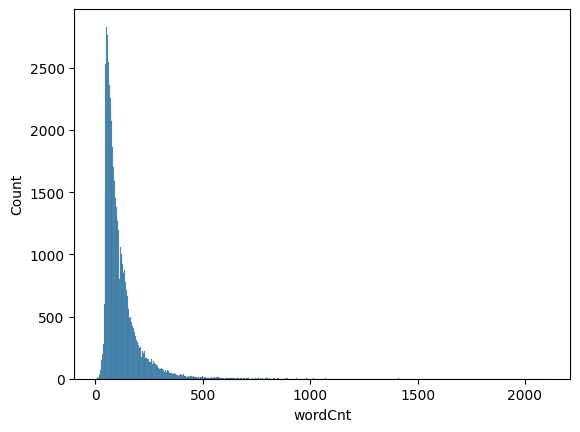

In [13]:
sns.histplot(train['wordCnt'])

<Axes: ylabel='Genre'>

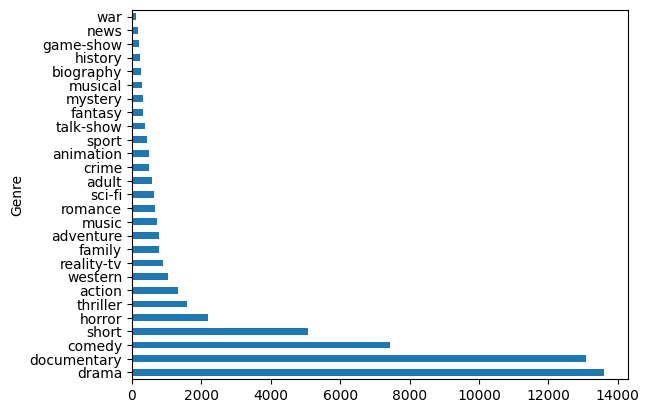

In [14]:
train['Genre'].value_counts().plot(kind = 'barh')

# Data Cleaning

In [15]:
pd.value_counts(train.duplicated())

<ipython-input-15-ec037a5d89ac>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train.duplicated())


,count
False,54214


In [16]:
pd.value_counts(test.duplicated())

<ipython-input-16-2cff1dc07cef>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(test.duplicated())


,count
False,54200


In [17]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())   # replace `word-word` as `word word`
    text = re.sub(f'[{string.digits}]',' ',text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # remove punctuations


# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [18]:
train['Clean_Summary'] = train.Summary.apply(clean_text)
test['Clean_Summary'] = test.Summary.apply(clean_text)

In [19]:
train['wordCnt2'] = train['Clean_Summary'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
train.head()

,Index,Name,Genre,Summary,wordCnt,Clean_Summary,wordCnt2
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,105,list convers doct parents year old osc learn n...,52
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,34,broth sist past incestu rel cur murd relations...,15
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,129,bus empty stud field trip muse nat history lit...,52
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,216,help unemploy fath mak end meet edi twin sist ...,107
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,115,films titl ref recov body ground zero also sta...,49


In [21]:
test.head()

,Index,Name,Genre,Summary,Clean_Summary
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart...",bran lov lif car apartment job espec girlfrien...
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi...",spain march quico naughty child three belong w...
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...,year lif albin famy shepherd transylvania dire...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his...",fath died spok broth year sery cancer diego ta...
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...,known intern mart art superstar bruc lee appea...


<Axes: xlabel='wordCnt', ylabel='Count'>

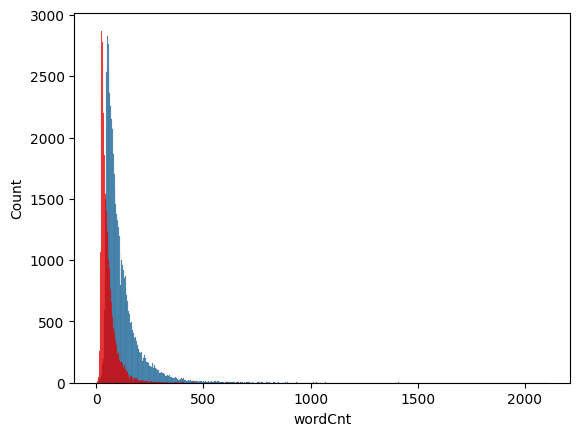

In [22]:
sns.histplot(train['wordCnt'])
sns.histplot(train['wordCnt2'], color = 'red')

In [23]:
print('Dataframe size before removal: ',len(train))
filt=train['wordCnt2']>500
train.drop(train[filt].index,axis=0,inplace=True)     # filter rows having cleaned description length > 500
print('Dataframe size after removal: ',len(train))

Dataframe size before removal:  54214
Dataframe size after removal:  54197


# Vectorization

In [24]:
encoder = LabelEncoder()
train['Genre'] = encoder.fit_transform(train['Genre'])
test['Genre'] = encoder.fit_transform(test['Genre'])

In [25]:
train.head()

,Index,Name,Genre,Summary,wordCnt,Clean_Summary,wordCnt2
0,1,Oscar et la dame rose (2009),8,Listening in to a conversation between his doc...,105,list convers doct parents year old osc learn n...,52
1,2,Cupid (1997),24,A brother and sister with a past incestuous re...,34,broth sist past incestu rel cur murd relations...,15
2,3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fiel...,129,bus empty stud field trip muse nat history lit...,52
3,4,The Secret Sin (1915),8,To help their unemployed father make ends meet...,216,help unemploy fath mak end meet edi twin sist ...,107
4,5,The Unrecovered (2007),8,The film's title refers not only to the un-rec...,115,films titl ref recov body ground zero also sta...,49


In [26]:
test.head()

,Index,Name,Genre,Summary,Clean_Summary
0,1,Edgar's Lunch (1998),24,"L.R. Brane loves his life - his car, his apart...",bran lov lif car apartment job espec girlfrien...
1,2,La guerra de papá (1977),5,"Spain, March 1964: Quico is a very naughty chi...",spain march quico naughty child three belong w...
2,3,Off the Beaten Track (2010),7,One year in the life of Albin and his family o...,year lif albin famy shepherd transylvania dire...
3,4,Meu Amigo Hindu (2015),8,"His father has died, he hasn't spoken with his...",fath died spok broth year sery cancer diego ta...
4,5,Er nu zhai (1955),8,Before he was known internationally as a marti...,known intern mart art superstar bruc lee appea...


In [27]:
train_text = train['Clean_Summary']
train_label = train['Genre']
test_text = test['Clean_Summary']
test_label = test['Genre']

In [28]:
trainWord = train['Clean_Summary'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 30000)
tokenizer.fit_on_texts(train_text)
sequences = tokenizer.texts_to_sequences(train_text)
max_word = np.max(trainWord)
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = max_word, padding = 'post')
train_text_array = np.array(padded)
train_text_array.shape

(54197, 496)

In [30]:

tokenizer.fit_on_texts(test_text)
sequences = tokenizer.texts_to_sequences(test_text)
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen = max_word, padding = 'post')
test_text_array = np.array(padded)
test_text_array.shape

(54200, 496)

In [31]:
train_text_array

array([[ 801, 1242,  511, ...,    0,    0,    0],
       [ 161,  257,  103, ...,    0,    0,    0],
       [1353, 1501,  210, ...,    0,    0,    0],
       ...,
       [ 354,  253,  264, ...,    0,    0,    0],
       [1982, 3585,    3, ...,    0,    0,    0],
       [1225,   21, 1040, ...,    0,    0,    0]], dtype=int32)

In [32]:
test_text_array

array([[28346,    14,     4, ...,     0,     0,     0],
       [ 1731,  1415,  5920, ...,     0,     0,     0],
       [    8,     4, 17179, ...,     0,     0,     0],
       ...,
       [  151,     8,  2704, ...,     0,     0,     0],
       [ 5742,   173,   384, ...,     0,     0,     0],
       [   47,  1699,  2611, ...,     0,     0,     0]], dtype=int32)

# Defining Model

In [42]:
inputs = tf.keras.Input(shape = (max_word,))

embedding = tf.keras.layers.Embedding(
    input_dim=30000,
    output_dim=128)(inputs)

lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False))(embedding)

dense = tf.keras.layers.Dense(64, activation='relu')(lstm)

outputs = tf.keras.layers.Dense(27, activation='softmax')(dense)


flatten = tf.keras.layers.Flatten()(embedding)
# outputs = tf.keras.layers.Dense(27, activation = 'softmax')(flatten)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy',
    tf.keras.metrics.AUC(name = 'auc')]
)

print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 496)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 496, 128)            │       3,840,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,121,371 (15.72 MB)

 Trainable params: 4,121,371 (15.72 MB)

 Non-trainable params: 0 (0.00 B)

None


# Training Model

In [34]:
train_label = tf.keras.utils.to_categorical(train_label, num_classes=27)


In [35]:
history = model.fit(
    train_text_array,
    train_label,
    validation_split = 0.2,
    batch_size = 40,
    epochs = 15,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/15
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 932s 854ms/step - accuracy: 0.4033 - auc: 0.8780 - loss: 2.1117 - val_accuracy: 0.4981 - val_auc: 0.9231 - val_loss: 1.7581
Epoch 2/15
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 975s 848ms/step - accuracy: 0.5875 - auc: 0.9446 - loss: 1.4592 - val_accuracy: 0.5351 - val_auc: 0.9328 - val_loss: 1.6133
Epoch 3/15
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 911s 837ms/step - accuracy: 0.6837 - auc: 0.9675 - loss: 1.1039 - val_accuracy: 0.5324 - val_auc: 0.9230 - val_loss: 1.7089
Epoch 4/15
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 929s 844ms/step - accuracy: 0.7651 - auc: 0.9802 - loss: 0.8277 - val_accuracy: 0.5195 - val_auc: 0.9114 - val_loss: 1.8781
Epoch 5/15
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 939s 860ms/step - accuracy: 0.8264 - auc: 0.9891 - loss: 0.5937 - val_accuracy: 0.5118 - val_auc: 0.8904 - val_loss: 2.1575


# Evaluating Model

Text(0.5, 1.0, 'Accuracy')

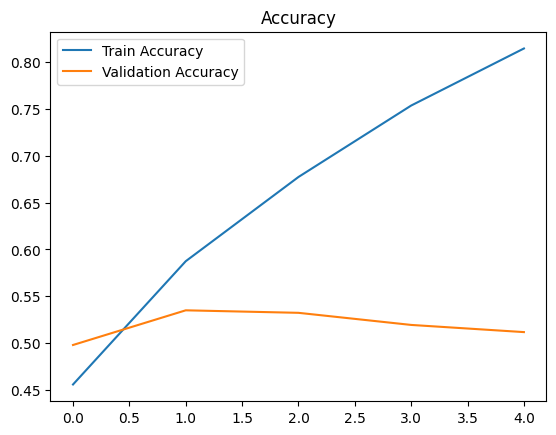

In [38]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

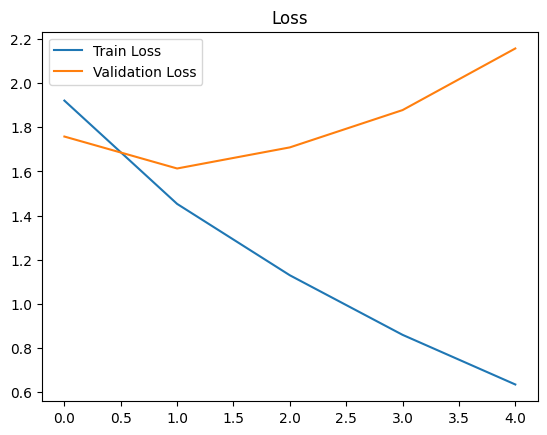

In [39]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Evaluating Model using Testing Dataset

In [40]:
test_label = tf.keras.utils.to_categorical(test_label, num_classes=27)

In [41]:
results = model.evaluate(test_text_array, test_label, verbose = 0)
print("Test Loss: ", (results[0]))
print("Test Accuracy: ", results[1])

Test Loss:  3.3009910583496094
Test Accuracy:  0.004538745619356632
